In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer
# Đọc dữ liệu từ sklearn
cancer_set = load_breast_cancer()

# Chuyển thành DataFrame
cancer_data = pd.DataFrame(data=cancer_set ['data'], columns=cancer_set['feature_names'])

cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# import missingno as msno

# #check for null/missing values
# cancer_data.info()
# msno.bar(cancer_data)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(rc={'figure.figsize':(15,10)})
# sns.heatmap(cancer_data.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
# plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(cancer_data)

# Thực hiện transform scale
scale_data = scaler.transform(cancer_data)

In [ ]:
from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 2
my_pca = PCA (n_components = 2 )

# Fit vào data
my_pca.fit(scale_data)

# Thực hiện transform
pca_scale_data = my_pca.transform(scale_data)

explained_variance_ratio = my_pca.explained_variance_ratio_
print("Variance Ratio:", explained_variance_ratio)

print("Dữ liệu gốc: ", scale_data.shape)
print("Dữ liệu sau PCA:" , pca_scale_data.shape)

Variance Ratio: [0.44272026 0.18971182]
Dữ liệu gốc:  (569, 30)
Dữ liệu sau PCA: (569, 2)


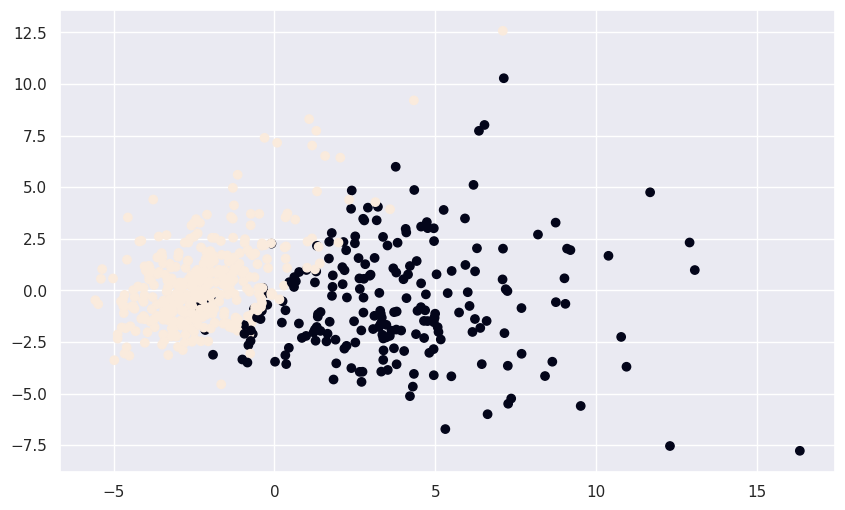

In [ ]:
plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = pca_scale_data[:, 0]
# Thành phần comp số 2
pca_2 = pca_scale_data[:, 1]

# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2, c = cancer_set['target'])
# plt.scatter(x=pca_1, y = pca_2)


In [ ]:
pca_comp = pd.DataFrame(data=my_pca.components_, columns=cancer_data.columns)
pca_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [ ]:
import plotly.express as px

# Tạo DataFrame mới với dữ liệu PCA và cột target từ breast cancer dataset
pca_df = pd.DataFrame(data=pca_scale_data, columns=['PC1', 'PC2'])
pca_df['target'] = cancer_set.target

# Sử dụng plotly để vẽ scatter 3D
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z=np.zeros_like(pca_df['PC1']),
                    color='target', symbol='target',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                    title='3D Scatter Plot of Breast Cancer Dataset after PCA')

# Hiển thị biểu đồ
fig.show()


Variance Ratio: [0.44272026 0.18971182]
Dữ liệu gốc:  (569, 30)
Dữ liệu sau PCA: (569, 2)


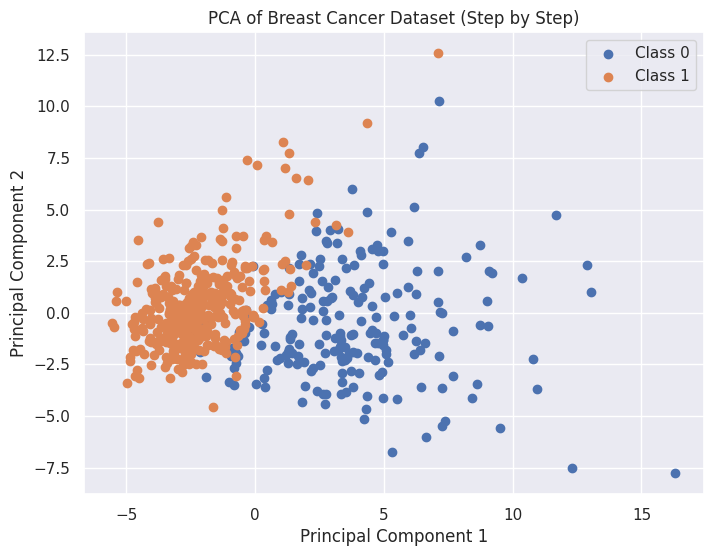

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dữ liệu Iris
breast_cancer_tucode = load_breast_cancer()
X = breast_cancer_tucode.data
y = breast_cancer_tucode.target

scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(X)

# Thực hiện transform scale
scale_X = scaler.transform(X)

def perform_pca(X, k=2):
    """
    Thực hiện phân tích thành phần chính (PCA) cho dữ liệu X.

    Parameters:
    - X: Dữ liệu đầu vào, mỗi hàng là một quan sát, mỗi cột là một biến.
    - k: Số chiều mới mong muốn.

    Returns:
    - X_pca: Dữ liệu sau khi chiếu vào không gian mới.
    - explained_variance_ratio: Tỉ lệ giữ lại phương sai của từng thành phần chính.
    """

    # Trung bình hóa dữ liệu
    mean_vector = np.mean(X, axis=0)
    X_centered = X - mean_vector

    # Tính ma trận hiệp phương sai
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Tính các giá trị riêng và vector riêng của ma trận hiệp phương sai
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sắp xếp các giá trị riêng và vector riêng theo thứ tự giảm dần
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Chọn số chiều mới (k)
    selected_eigenvalues = eigenvalues[:k]
    selected_eigenvectors = eigenvectors[:, :k]

    # Chiếu dữ liệu vào không gian mới
    X_pca = X_centered.dot(selected_eigenvectors)

    # Tính tỉ lệ giữ lại phương sai của từng thành phần chính
    explained_variance_ratio = selected_eigenvalues / np.sum(eigenvalues)

    return X_pca, explained_variance_ratio

my_pca_tucode, explained_variance_ratio_tucode = perform_pca(scale_X)
print("Variance Ratio:", explained_variance_ratio_tucode)

print("Dữ liệu gốc: ", scale_X.shape)

print("Dữ liệu sau PCA:" , my_pca_tucode.shape)

# Trực quan hóa dữ liệu sau khi giảm chiều
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(my_pca_tucode[y == i, 0], my_pca_tucode[y == i, 1], label=f'Class {i}')
plt.title('PCA of Breast Cancer Dataset (Step by Step)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

# Tạo DataFrame mới với dữ liệu PCA và cột target từ breast cancer dataset
pca_df = pd.DataFrame(data=my_pca_tucode, columns=['PC1', 'PC2'])
pca_df['target'] = cancer_set.target

# Sử dụng plotly để vẽ scatter 3D
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z=np.zeros_like(pca_df['PC1']),
                    color='target', symbol='target',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                    title='3D Scatter Plot of Breast Cancer Dataset after PCA')

# Hiển thị biểu đồ
fig.show()

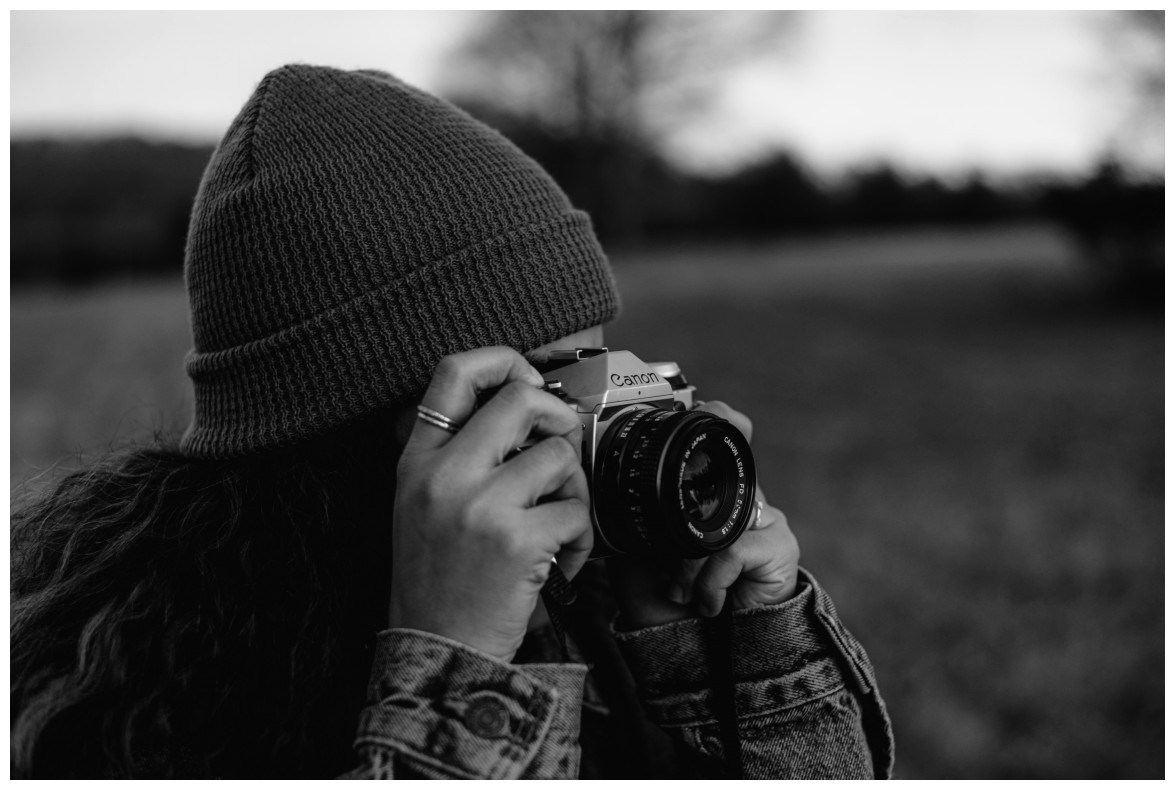

(4000, 6000)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

image_path = 'pca.jpg'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img_show = plt.imshow(img)
img_show.set_cmap('gray')
plt.axis('off')
plt.show()
print(img.shape)

(4000, 20)


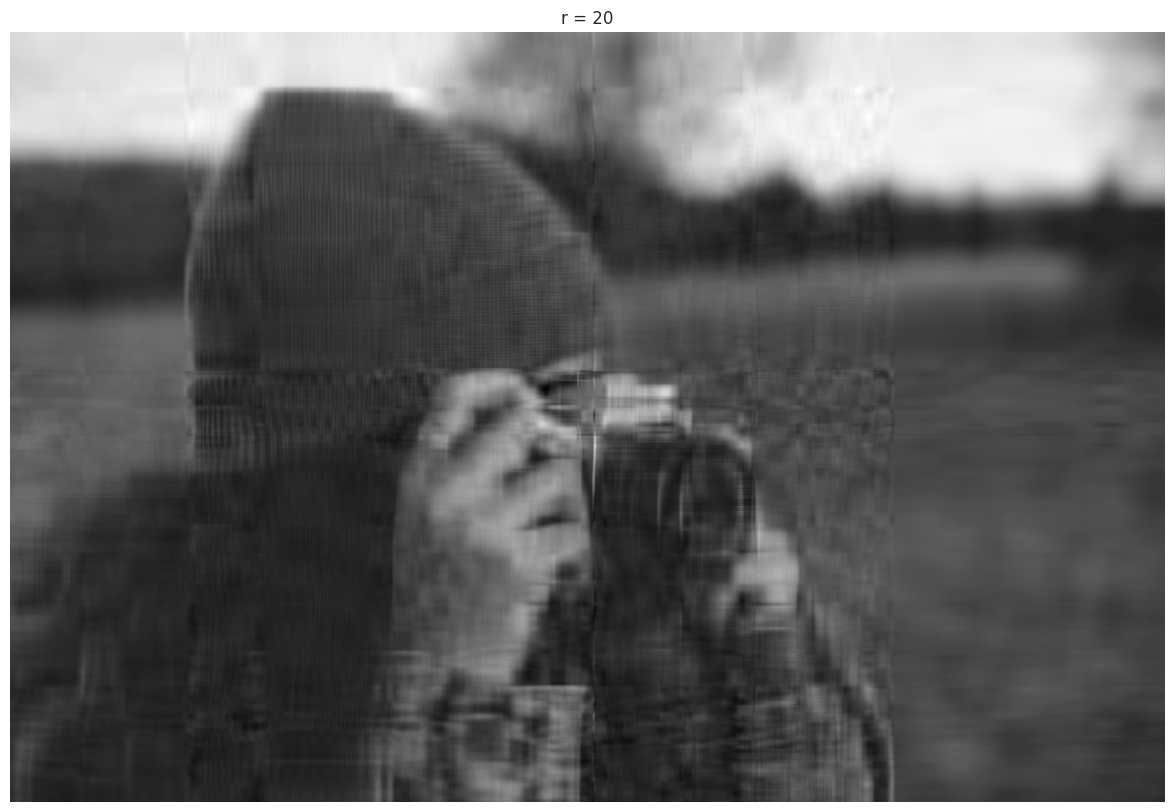

(4000, 50)


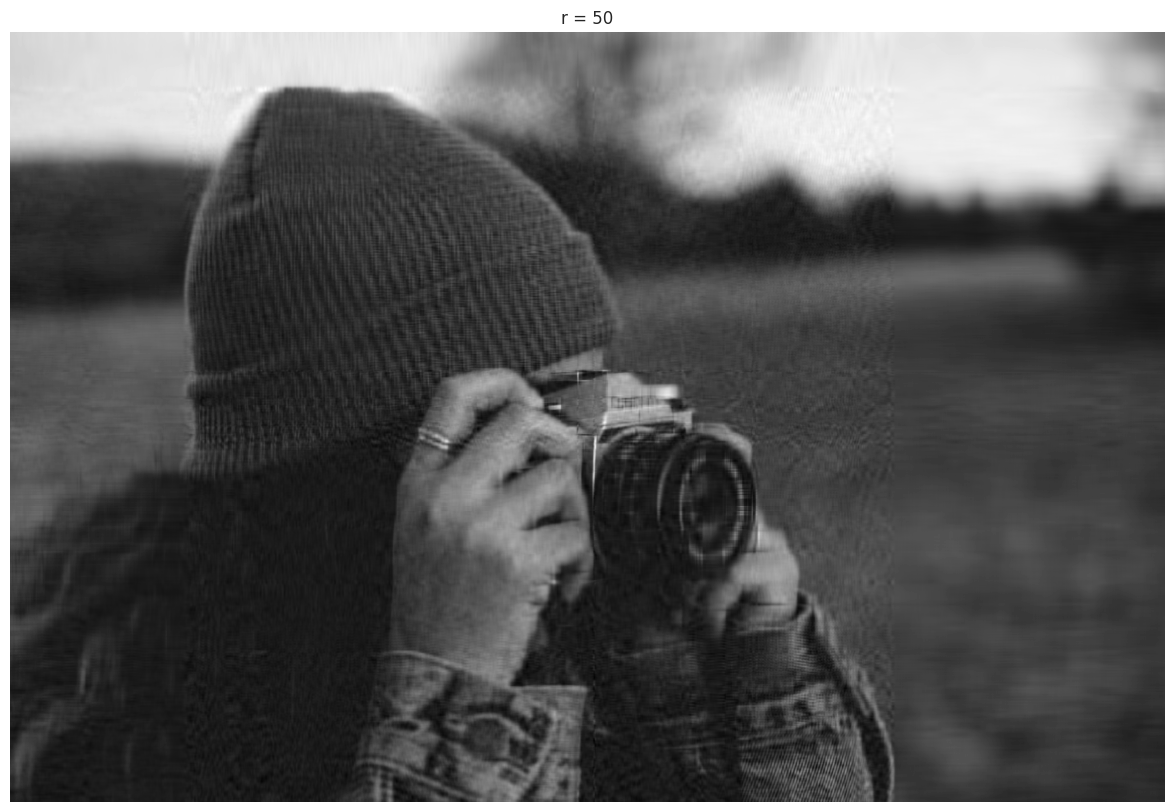

(4000, 100)


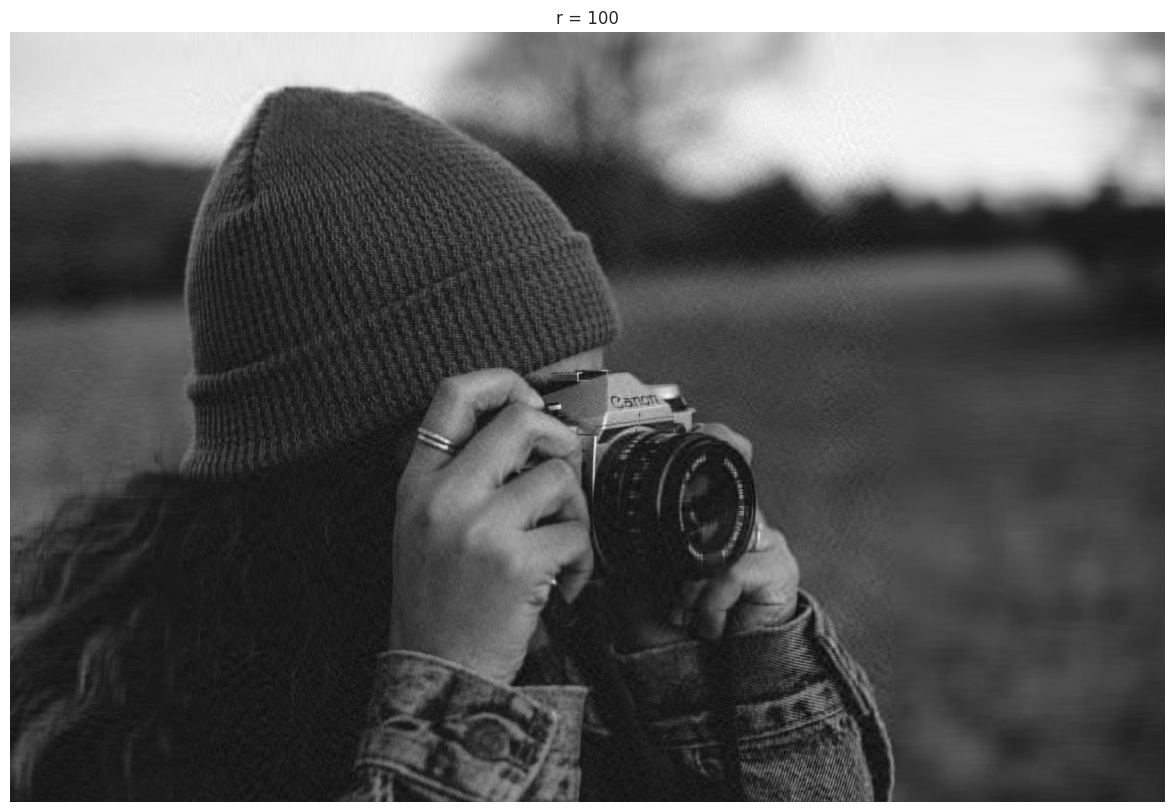

(4000, 200)


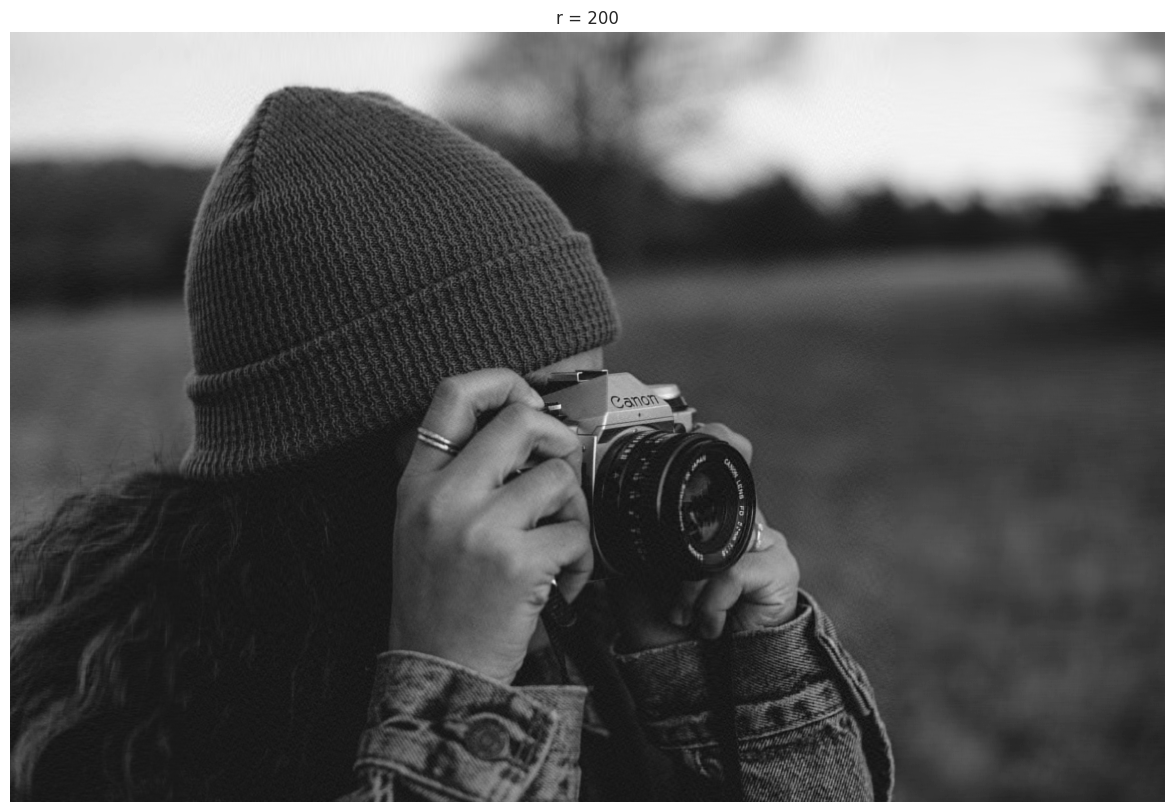

In [ ]:
for r in (20, 50, 100, 200):
  pca = PCA(r)
  pca.fit(img)
  my_pca = pca.transform(img)

  plt.title('r = ' + str(pca.n_components_))
  print(my_pca.shape)
  img_show = plt.imshow(pca.inverse_transform(my_pca))
  img_show.set_cmap('gray')
  plt.axis('off')
  plt.show()